[Our task](../02/sampling_problem) has been to reply to the Supreme Court on
their judgment in the appeal of Robert Swain.

Remember, Robert Swain appealed his death sentence, for rape, on the
basis that the jury selection was biased against black people.

His trial had a jury pool, of 100, from which the jury had to be selected.
That jury pool should have been representative of the local population.

The jury pool had 8 black people, but the local population was 26% black.

If the jury pool had been representative, we would expect about 26 of 100
people to be black.  Our question is what we mean by *about* 26 of 100.

The Supreme Court thought that the difference between expected (26) and actual
(8) was small. But was it?  Does 8 of 100 fit somewhere in our description of
*about* 26 of 100?

To answer this, we are going to *simulate* making a jury pool.

Our *model* is that each juror has been randomly selected from the population.
That is, for any one juror, there is a 0.26 probability that they are black.

First we make one jury pool, of 100, to remind ourselves of the task.

Then we make 10 jury pools of 100, to get warmed up.

Finally we make 10000 jury pools, each of 100 members, and see what we get.

In [1]:
# Import the array library
import numpy as np
# Make the floating point numbers print nicely.
# This does not affect the calculations, only the display.
np.set_printoptions(precision=2, suppress=True)

Here is one jury pool, and the number of black people we get in our simulation.

In [2]:
# Make 100 random numbers between 0 and 1
randoms = np.random.uniform(size=100)
# Say values < 0.26 correspond to black jurors.
black_yn = randoms < 0.26
# We now have True for black jurors and False otherwise.
# Count the number of Trues
np.count_nonzero(black_yn)

29

That is one estimate, for the number of black people we can expect, if our
model is correct.  We can run that a few times to get a range of values.   If
we run it only a few times, we might be unlucky, and get some results that are
not representative.  It is safer to run it a huge number of times, to make sure
we've got an idea of the variation.

We do that, by using a two-dimensional array.

We will start by making 10 jury pools, to get warmed up.  Later we will use
a much higher number.

In [3]:
# Make an array with 10 rows, and 100 columns.
# Each row corresponds to one jury pool
randoms_2d = np.random.uniform(size=(10, 100))

Next we label each element in the array as `True` (black juror) or `False`
(white juror).

In [4]:
# Set True for black jurors
black_yn_2d = randoms_2d < 0.26

We count how many `True` values we have in each *row*:

In [5]:
black_counts = np.count_nonzero(black_yn_2d, axis=1)
black_counts

array([26, 25, 30, 30, 29, 26, 26, 26, 32, 26])

Each of these values is one estimate for how many black jurors we should
expect, if our model is right.  Already we get the feeling that 8 is rather
unlikely, if our model is correct.  But - how unlikely?

To get a better estimate, let us do the same thing, but with 10000 jury pools,
and therefore, 10000 estimates.

In [6]:
randoms_2d_big = np.random.uniform(size=(10000, 100))
black_yn_big = randoms_2d_big < 0.26
black_counts_big = np.count_nonzero(black_yn_big, axis=1)

If you ran this cell yourself, you will notice that it runs very fast, in much
less than a second, on a reasonable laptop.

We now have 10000 estimates, one for each row in the original array, and
therefore, one for each simulated jury pool.

Remember, the function `len` shows us the length of the array, and therefore,
the number of values in this one-dimensional array.

In [7]:
len(black_counts_big)

10000

Next we want to have a look at the spread of these values.  To do this, we plot
a histogram.  Here is how to do that, in Python:

In [8]:
# Load the plotting library
import matplotlib.pyplot as plt

In [9]:
# A special command to tell the Notebook to show us
# the plots inside the Notebook
%matplotlib inline

(array([   35.,   182.,   816.,  1862.,  2581.,  2968.,  1065.,   376.,
           99.,    16.]),
 array([ 11. ,  14.2,  17.4,  20.6,  23.8,  27. ,  30.2,  33.4,  36.6,
         39.8,  43. ]),
 <a list of 10 Patch objects>)

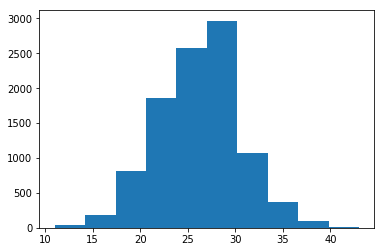

In [10]:
# Do the histogram of our 10000 estimates.
plt.hist(black_counts_big)

It looks as if 8 is nowhere on the spread of our estimates.  How many times did
we get a value less than or equal to 8, in all our 10000 estimates?

In [11]:
counts_are_low = black_counts_big < 9
np.count_nonzero(counts_are_low)

0

In 10000 random jury pools, we never see a value as low as 8.  We can ask Numpy
to show us the minimum value that we do see, by using the `np.min` function:

In [12]:
np.min(black_counts_big)

11

We have run an analysis assuming that the jurors were selected at random.  On
that assumption, a count of 8 jurors in 1000 is incredibly unlikely.  It is so
unlikely, that we never get a number as low as 8, in 10000 repeats.   That
makes us think that the probability of getting 8 black people in a jury pool of
100, is less than 1 in 10000 or:

In [13]:
1 / 10000

0.0001